In [1]:
import torch
import torchvision
import torchvision.transforms as transforms
from PIL import Image
import os
      


In [2]:
input_size = 3072
D_in = input_size
H = 50
D_out = 10
num_epochs = 30
transformation = transforms.Compose( [transforms.Resize((32,32)), 
                                          transforms.ToTensor(),
                                          transforms.Normalize(mean=[0.5, 0.5, 0.5],
                                          std=[0.5, 0.5, 0.5])])
training_set = torchvision.datasets.ImageFolder('/Users/jgold/Documents/GitHub/Artifical-Intelligence-Project/Training', 
                                                transform=transformation)
                                                
train_loader = torch.utils.data.DataLoader(training_set, batch_size=100, shuffle=True, num_workers=2)
testing_set = torchvision.datasets.ImageFolder('/Users/jgold/Documents/GitHub/Artifical-Intelligence-Project/Testing', transform=transformation)
test_loader = torch.utils.data.DataLoader(testing_set, batch_size=100, shuffle=True, num_workers=2)

print(len(train_loader))
print(len(test_loader))

33
11


In [3]:
import torch.nn as nn
import torch.nn.functional as F
import torch.utils.data as td

class MultiLayerFCNet(nn.Module):
    def __init__(self, D_in, H, D_out):
        super(MultiLayerFCNet, self).__init__()
        self.linear1 = torch.nn.Linear(D_in, H)
        self.linear2 = torch.nn.Linear(H, H)
        self.linear3 = torch.nn.Linear(H, H)
        self.linear4 = torch.nn.Linear(H, D_out)
    def forward(self, x):
        x = F.relu(self.linear1(x))
        x = F.relu(self.linear2(x))
        x = F.relu(self.linear3(x))
        x = self.linear4(x)
        return F.log_softmax(x,dim=1)


In [4]:
model = MultiLayerFCNet(D_in, H, D_out)
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01, momentum=0.9)

In [5]:
for epoch in range(num_epochs):
    avg_loss_epoch = 0
    batch_loss = 0
    total_batches = 0
    for i, (images, labels) in enumerate(train_loader):
        images = images.reshape(-1, 32 * 32 * 3)
        outputs = model(images)
        loss = criterion(outputs, labels)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        total_batches += 1
        batch_loss += loss.item()
        avg_loss_epoch = batch_loss / total_batches
    print('Epoch [{}/{}], Averge Loss:for epoch[{}, {:.4f}]'
    .format(epoch + 1, num_epochs, epoch + 1, avg_loss_epoch))

Epoch [1/30], Averge Loss:for epoch[1, 1.9400]
Epoch [2/30], Averge Loss:for epoch[2, 1.2361]
Epoch [3/30], Averge Loss:for epoch[3, 0.9805]
Epoch [4/30], Averge Loss:for epoch[4, 0.8878]
Epoch [5/30], Averge Loss:for epoch[5, 0.8389]
Epoch [6/30], Averge Loss:for epoch[6, 0.7893]
Epoch [7/30], Averge Loss:for epoch[7, 0.7480]
Epoch [8/30], Averge Loss:for epoch[8, 0.7182]
Epoch [9/30], Averge Loss:for epoch[9, 0.6859]
Epoch [10/30], Averge Loss:for epoch[10, 0.6626]
Epoch [11/30], Averge Loss:for epoch[11, 0.6165]
Epoch [12/30], Averge Loss:for epoch[12, 0.5705]
Epoch [13/30], Averge Loss:for epoch[13, 0.5387]
Epoch [14/30], Averge Loss:for epoch[14, 0.5315]
Epoch [15/30], Averge Loss:for epoch[15, 0.5035]
Epoch [16/30], Averge Loss:for epoch[16, 0.4904]
Epoch [17/30], Averge Loss:for epoch[17, 0.4314]
Epoch [18/30], Averge Loss:for epoch[18, 0.4295]
Epoch [19/30], Averge Loss:for epoch[19, 0.3730]
Epoch [20/30], Averge Loss:for epoch[20, 0.3418]
Epoch [21/30], Averge Loss:for epoch[2

In [6]:
#testing before training just to see
correct = 0
total = 0
for images, labels in test_loader:
    images = images.reshape(-1, 3 * 32 * 32)
    outputs_test = model(images)
    _, predicted = torch.max(outputs_test.data, 1)
    total += labels.size(0)
    correct += (predicted == labels).sum().item()
    print('Accuracy of the network on the 1000 test images: %d %%'
    % (100 * correct / total))


Accuracy of the network on the 1000 test images: 60 %
Accuracy of the network on the 1000 test images: 56 %
Accuracy of the network on the 1000 test images: 58 %
Accuracy of the network on the 1000 test images: 57 %
Accuracy of the network on the 1000 test images: 56 %
Accuracy of the network on the 1000 test images: 56 %
Accuracy of the network on the 1000 test images: 55 %
Accuracy of the network on the 1000 test images: 55 %
Accuracy of the network on the 1000 test images: 56 %
Accuracy of the network on the 1000 test images: 56 %
Accuracy of the network on the 1000 test images: 57 %


In [7]:
#building neural network
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv_layer = nn.Sequential(
        nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3, padding=1),
        nn.BatchNorm2d(32),
        nn.LeakyReLU(inplace=True),
        nn.Conv2d(in_channels=32, out_channels=32, kernel_size=3, padding=1),
        nn.BatchNorm2d(32),
        nn.LeakyReLU(inplace=True),
        nn.MaxPool2d(kernel_size=2, stride=2),
        nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, padding=1),
        nn.BatchNorm2d(64),
        nn.LeakyReLU(inplace=True),
        nn.Conv2d(in_channels=64, out_channels=64, kernel_size=3, padding=1),
        nn.BatchNorm2d(64),
        nn.LeakyReLU(inplace=True),
        nn.MaxPool2d(kernel_size=2, stride=2),
    )
        self.fc_layer = nn.Sequential(
        nn.Dropout(p=0.1),
        nn.Linear(8 * 8 * 64, 1000),
        nn.ReLU(inplace=True),
        nn.Linear(1000, 512),
        nn.ReLU(inplace=True),
        nn.Dropout(p=0.1),
        nn.Linear(512, 10)
    )
    def forward(self, x):
        # conv layers
        x = self.conv_layer(x)
        # flatten
        x = x.view(x.size(0), -1)
        # fc layer
        x = self.fc_layer(x)
        return x


In [8]:
num_epochs = 30
num_classes = 4
learning_rate = 0.001


In [9]:
#initializing CNN
model = CNN()
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [10]:
#training the model
total_step = len(train_loader)
loss_list = []
acc_list = []
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss_list.append(loss.item())
        # Backprop and optimisation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        # Train accuracy
        total = labels.size(0)
        _, predicted = torch.max(outputs.data, 1)
        correct = (predicted == labels).sum().item()
        acc_list.append(correct / total)
    print('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}, Accuracy: {:.2f}%'
        .format(epoch + 1, num_epochs, i + 1, total_step, loss.item(),
        (correct / total) * 100))

Epoch [1/30], Step [33/33], Loss: 0.9144, Accuracy: 60.26%
Epoch [2/30], Step [33/33], Loss: 0.9062, Accuracy: 58.97%
Epoch [3/30], Step [33/33], Loss: 0.7330, Accuracy: 78.21%
Epoch [4/30], Step [33/33], Loss: 0.5403, Accuracy: 82.05%
Epoch [5/30], Step [33/33], Loss: 0.4627, Accuracy: 82.05%
Epoch [6/30], Step [33/33], Loss: 0.5758, Accuracy: 79.49%
Epoch [7/30], Step [33/33], Loss: 0.5317, Accuracy: 78.21%
Epoch [8/30], Step [33/33], Loss: 0.4283, Accuracy: 82.05%
Epoch [9/30], Step [33/33], Loss: 0.3584, Accuracy: 84.62%
Epoch [10/30], Step [33/33], Loss: 0.2672, Accuracy: 91.03%
Epoch [11/30], Step [33/33], Loss: 0.2151, Accuracy: 94.87%
Epoch [12/30], Step [33/33], Loss: 0.2670, Accuracy: 89.74%
Epoch [13/30], Step [33/33], Loss: 0.2536, Accuracy: 89.74%
Epoch [14/30], Step [33/33], Loss: 0.1458, Accuracy: 92.31%
Epoch [15/30], Step [33/33], Loss: 0.1592, Accuracy: 92.31%
Epoch [16/30], Step [33/33], Loss: 0.0952, Accuracy: 97.44%
Epoch [17/30], Step [33/33], Loss: 0.0459, Accura

In [11]:
#testing the model after it has beeen trained
model.eval()
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_loader:
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        print('Test Accuracy of the model on the 1000 test images: {} %'
          .format((correct / total) * 100))

Test Accuracy of the model on the 1000 test images: 66.0 %
Test Accuracy of the model on the 1000 test images: 67.0 %
Test Accuracy of the model on the 1000 test images: 68.66666666666667 %
Test Accuracy of the model on the 1000 test images: 67.0 %
Test Accuracy of the model on the 1000 test images: 68.60000000000001 %
Test Accuracy of the model on the 1000 test images: 70.33333333333334 %
Test Accuracy of the model on the 1000 test images: 69.57142857142857 %
Test Accuracy of the model on the 1000 test images: 69.75 %
Test Accuracy of the model on the 1000 test images: 69.66666666666667 %
Test Accuracy of the model on the 1000 test images: 69.3 %
Test Accuracy of the model on the 1000 test images: 69.26782273603082 %


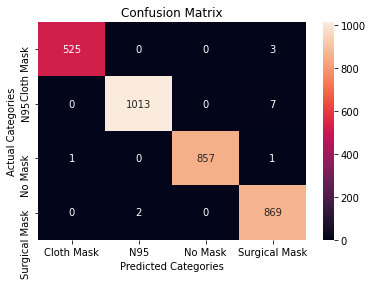

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       526
           1       0.99      1.00      1.00      1015
           2       1.00      1.00      1.00       857
           3       1.00      0.99      0.99       880

    accuracy                           1.00      3278
   macro avg       1.00      1.00      1.00      3278
weighted avg       1.00      1.00      1.00      3278



In [12]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import seaborn as sns

#building Confusion Matrix as well as getting accuracy, predictions and F1 score for train model
model.eval()
prediction_list = []
accurate_list = []
with torch.no_grad():
    for images, labels in train_loader:
        outputs = model(images)
        _, predicted = torch.max(model(images), 1)
        prediction_list.extend(predicted.detach().cpu().numpy())
        accurate_list.extend(labels.detach().cpu().numpy())
  
  
confusion_matrix_data = confusion_matrix(accurate_list, prediction_list)
confusionMatrix = sns.heatmap(confusion_matrix_data, annot=True, fmt='g' )
confusionMatrix.set_title('Confusion Matrix');
confusionMatrix.set_xlabel('Predicted Categories')
confusionMatrix.set_ylabel('Actual Categories');
confusionMatrix.xaxis.set_ticklabels(['Cloth Mask','N95','No Mask','Surgical Mask'])
confusionMatrix.yaxis.set_ticklabels(['Cloth Mask','N95','No Mask','Surgical Mask'])

  
plt.show()

#printing Accuracy, Prediction and F1 score for training model
print(classification_report(prediction_list, accurate_list))

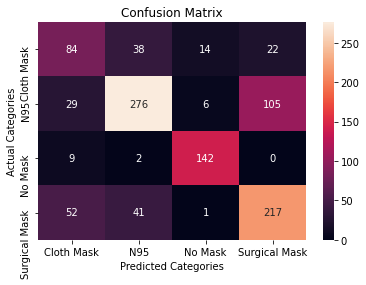

              precision    recall  f1-score   support

           0       0.53      0.48      0.51       174
           1       0.66      0.77      0.71       357
           2       0.93      0.87      0.90       163
           3       0.70      0.63      0.66       344

    accuracy                           0.69      1038
   macro avg       0.71      0.69      0.70      1038
weighted avg       0.69      0.69      0.69      1038



In [13]:
#building Confusion Matrix as well as getting accuracy, predictions and F1 score for test model
model.eval()
prediction_list = []
accurate_list = []
with torch.no_grad():
    for images, labels in test_loader:
        outputs = model(images)
        _, predicted = torch.max(model(images), 1)
        prediction_list.extend(predicted.detach().cpu().numpy())
        accurate_list.extend(labels.detach().cpu().numpy())
  
  
confusion_matrix_data = confusion_matrix(accurate_list, prediction_list)
confusionMatrix = sns.heatmap(confusion_matrix_data, annot=True, fmt='g' )
confusionMatrix.set_title('Confusion Matrix');
confusionMatrix.set_xlabel('Predicted Categories')
confusionMatrix.set_ylabel('Actual Categories');
confusionMatrix.xaxis.set_ticklabels(['Cloth Mask','N95','No Mask','Surgical Mask'])
confusionMatrix.yaxis.set_ticklabels(['Cloth Mask','N95','No Mask','Surgical Mask'])

  
plt.show()

#printing Accuracy, Prediction and F1 score for testing model
print(classification_report(prediction_list, accurate_list))

In [25]:
path = r"/Users/jgold/Documents/GitHub/Artifical-Intelligence-Project/Models/Model1.pt"
a_file = open('/Users/jgold/Documents/GitHub/Artifical-Intelligence-Project/Models/Model1.txt', encoding='utf-8')

torch.save(model.state_dict(), path)
